In [1]:
# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import requests
import time
from scipy.stats import linregress

# Import API key
from config import weather_api_key

# Incorporated citipy to determine city based on latitude and longitude
from citipy import citipy

# Output File (CSV)
output_data_file = "output_data/cities.csv"

# Range of latitudes and longitudes
lat_range = (-90, 90)
lng_range = (-180, 180)

In [2]:
# List for holding lat_lngs and cities
lat_lngs = []
cities = []

# Create a set of random lat and lng combinations
lats = np.random.uniform(lat_range[0], lat_range[1], size=1500)
lngs = np.random.uniform(lng_range[0], lng_range[1], size=1500)
lat_lngs = zip(lats, lngs)

# Identify nearest city for each lat, lng combination
for lat_lng in lat_lngs:
    city = citipy.nearest_city(lat_lng[0], lat_lng[1]).city_name
    
    # If the city is unique, then add it to a our cities list
    if city not in cities:
        cities.append(city)

# Print the city count to confirm sufficient count
len(cities)

617

In [3]:
cities

['christchurch',
 'richards bay',
 'bredasdorp',
 'hithadhoo',
 'vaini',
 'broome',
 'tuktoyaktuk',
 'atuona',
 'samusu',
 'busselton',
 'ribeira grande',
 'dikson',
 'pevek',
 'ardesen',
 'bluff',
 'sept-iles',
 'butaritari',
 'ancud',
 'hami',
 'rikitea',
 'saskylakh',
 'sitka',
 'sumbe',
 'khatanga',
 'alofi',
 'kodiak',
 'harrismith',
 'kalmunai',
 'hermanus',
 'kapaa',
 'ushuaia',
 'hamilton',
 'jamestown',
 'ilulissat',
 'bucine',
 'katangli',
 'anta',
 'luderitz',
 'benghazi',
 'avarua',
 'punta arenas',
 'geraldton',
 'saint-pierre',
 'constitucion',
 'mys shmidta',
 'port elizabeth',
 'tezu',
 'victoria',
 'yellowknife',
 'albany',
 'grand river south east',
 'pisco',
 'clyde river',
 'port alfred',
 'sompeta',
 'oktyabrskoye',
 'cozumel',
 'riyadh',
 'aklavik',
 'belaya gora',
 'georgetown',
 'hilo',
 'mataura',
 'lompoc',
 'tuatapere',
 'kurilsk',
 'khash',
 'peniche',
 'beyneu',
 'goderich',
 'nemuro',
 'tasiilaq',
 'new norfolk',
 'thompson',
 'severo-kurilsk',
 'hasaki',


Perform API Calls

Perform a weather check on each city using a series of successive API calls.
Include a print log of each city as it'sbeing processed (with the city number and city name).

In [4]:
print('Beginning Data Retrieval\n-----------------------------\n')

weather_list = []
rcd = 0
sets = 1

for city in cities:

    rcd += 1
    print(f'Processing Record {rcd} of Set {sets} | {city}')
    
    if rcd == 50:
        rcd = 0
        sets += 1
        
    url = f'https://api.openweathermap.org/data/2.5/weather?q={city}&appid={weather_api_key}&units=imperial'
    
    weather = requests.get(url).json()
    
    try:
        weather_list.append({
            'city': city,
            'lat': weather['coord']['lat'],
            'lng': weather['coord']['lon'],
            'temp': weather['main']['temp_max'],
            'humidity': weather['main']['humidity'],
            'wind':weather['wind']['speed'],
            'cloudiness':weather['clouds']['all'],
            'country':weather['sys']['country'],
            'date':weather['dt']
        })
        
    except:
        print('City not found. Skipping...')
        pass
    
print('-----------------------------\nData Retrieval Complete\n-----------------------------')

Beginning Data Retrieval
-----------------------------

Processing Record 1 of Set 1 | christchurch
Processing Record 2 of Set 1 | richards bay
Processing Record 3 of Set 1 | bredasdorp
Processing Record 4 of Set 1 | hithadhoo
Processing Record 5 of Set 1 | vaini
Processing Record 6 of Set 1 | broome
Processing Record 7 of Set 1 | tuktoyaktuk
Processing Record 8 of Set 1 | atuona
Processing Record 9 of Set 1 | samusu
City not found. Skipping...
Processing Record 10 of Set 1 | busselton
Processing Record 11 of Set 1 | ribeira grande
Processing Record 12 of Set 1 | dikson
Processing Record 13 of Set 1 | pevek
Processing Record 14 of Set 1 | ardesen
Processing Record 15 of Set 1 | bluff
Processing Record 16 of Set 1 | sept-iles
Processing Record 17 of Set 1 | butaritari
Processing Record 18 of Set 1 | ancud
Processing Record 19 of Set 1 | hami
Processing Record 20 of Set 1 | rikitea
Processing Record 21 of Set 1 | saskylakh
Processing Record 22 of Set 1 | sitka
Processing Record 23 of Set

Processing Record 40 of Set 4 | kovdor
Processing Record 41 of Set 4 | beringovskiy
Processing Record 42 of Set 4 | faanui
Processing Record 43 of Set 4 | kahului
Processing Record 44 of Set 4 | manuk mangkaw
Processing Record 45 of Set 4 | auburn
Processing Record 46 of Set 4 | belushya guba
City not found. Skipping...
Processing Record 47 of Set 4 | meiringen
Processing Record 48 of Set 4 | matagami
Processing Record 49 of Set 4 | vao
Processing Record 50 of Set 4 | bethel
Processing Record 1 of Set 5 | saint-augustin
Processing Record 2 of Set 5 | tsihombe
City not found. Skipping...
Processing Record 3 of Set 5 | mut
Processing Record 4 of Set 5 | kruisfontein
Processing Record 5 of Set 5 | yomitan
City not found. Skipping...
Processing Record 6 of Set 5 | esperance
Processing Record 7 of Set 5 | shubarkuduk
Processing Record 8 of Set 5 | hede
Processing Record 9 of Set 5 | zhigansk
Processing Record 10 of Set 5 | aksu
Processing Record 11 of Set 5 | kattivakkam
Processing Record 1

Processing Record 30 of Set 8 | tulun
Processing Record 31 of Set 8 | lebu
Processing Record 32 of Set 8 | san jose
Processing Record 33 of Set 8 | linxia
Processing Record 34 of Set 8 | sambava
Processing Record 35 of Set 8 | acapulco
Processing Record 36 of Set 8 | barrancabermeja
Processing Record 37 of Set 8 | dauphin
Processing Record 38 of Set 8 | jumla
Processing Record 39 of Set 8 | khuzdar
Processing Record 40 of Set 8 | booue
Processing Record 41 of Set 8 | vilyuysk
Processing Record 42 of Set 8 | bereda
Processing Record 43 of Set 8 | honiara
Processing Record 44 of Set 8 | domoni
Processing Record 45 of Set 8 | kaseda
Processing Record 46 of Set 8 | sisimiut
Processing Record 47 of Set 8 | gizo
Processing Record 48 of Set 8 | henties bay
Processing Record 49 of Set 8 | pachperwa
Processing Record 50 of Set 8 | la rioja
Processing Record 1 of Set 9 | qingdao
Processing Record 2 of Set 9 | sorvag
City not found. Skipping...
Processing Record 3 of Set 9 | helong
Processing Rec

Processing Record 23 of Set 12 | santiago del estero
Processing Record 24 of Set 12 | neiafu
Processing Record 25 of Set 12 | moranbah
Processing Record 26 of Set 12 | sola
Processing Record 27 of Set 12 | cumaribo
City not found. Skipping...
Processing Record 28 of Set 12 | sao domingos
Processing Record 29 of Set 12 | vardo
Processing Record 30 of Set 12 | naftah
City not found. Skipping...
Processing Record 31 of Set 12 | olinda
Processing Record 32 of Set 12 | sechura
Processing Record 33 of Set 12 | port hawkesbury
Processing Record 34 of Set 12 | huoqiu
Processing Record 35 of Set 12 | college
Processing Record 36 of Set 12 | tayshet
Processing Record 37 of Set 12 | kavaratti
Processing Record 38 of Set 12 | gazanjyk
Processing Record 39 of Set 12 | bonavista
Processing Record 40 of Set 12 | alytus
Processing Record 41 of Set 12 | pascagoula
Processing Record 42 of Set 12 | aktas
Processing Record 43 of Set 12 | sur
Processing Record 44 of Set 12 | berdigestyakh
Processing Record

Convert Raw Data to DataFrame

Export the city data into a .csv.

Display the DataFrame

In [6]:
city_data = pd.DataFrame(weather_list)
city_data.date = city_data.date.map(time.ctime)
city_data.to_csv('../../output_data/city_data.csv')
city_data.head()

,city,lat,lng,temp,humidity,wind,cloudiness,country,date
0,christchurch,-43.5333,172.6333,38.03,100,2.30,2,NZ,Wed Jun 2 15:36:14 2021
1,richards bay,-28.7830,32.0377,61.05,80,6.42,1,ZA,Wed Jun 2 15:25:42 2021
2,bredasdorp,-34.5322,20.0403,55.27,94,8.08,31,ZA,Wed Jun 2 15:36:16 2021
3,hithadhoo,-0.6000,73.0833,83.71,68,16.71,99,MV,Wed Jun 2 15:36:17 2021
4,vaini,-21.2000,-175.2000,69.96,83,2.30,75,TO,Wed Jun 2 15:36:18 2021


In [7]:
city_data.describe()

,lat,lng,temp,humidity,wind,cloudiness
count,577.000000,577.000000,577.000000,577.000000,577.000000,577.000000
mean,19.951248,24.506399,68.444818,68.474870,7.518059,54.261698
std,33.072550,90.683132,15.954035,21.885985,4.993440,38.985518
min,-54.800000,-175.200000,25.680000,7.000000,0.000000,0.000000
25%,-6.884400,-56.481900,57.880000,57.000000,3.740000,15.000000
50%,26.124700,29.658100,70.140000,73.000000,6.110000,58.000000
75%,46.130000,103.110600,80.560000,85.000000,10.270000,94.000000
max,78.218600,179.316700,106.650000,100.000000,27.630000,100.000000


 Inspect the data and remove the cities where the humidity > 100%.

Skip this step if there are no cities that have humidity > 100%.

In [9]:
#  Get rid of the indices of cities that have humidity over 100%.
city_data = city_data.loc[city_data["humidity"]<= 100]
city_data.head()

,city,lat,lng,temp,humidity,wind,cloudiness,country,date
0,christchurch,-43.5333,172.6333,38.03,100,2.30,2,NZ,Wed Jun 2 15:36:14 2021
1,richards bay,-28.7830,32.0377,61.05,80,6.42,1,ZA,Wed Jun 2 15:25:42 2021
2,bredasdorp,-34.5322,20.0403,55.27,94,8.08,31,ZA,Wed Jun 2 15:36:16 2021
3,hithadhoo,-0.6000,73.0833,83.71,68,16.71,99,MV,Wed Jun 2 15:36:17 2021
4,vaini,-21.2000,-175.2000,69.96,83,2.30,75,TO,Wed Jun 2 15:36:18 2021


 Plotting the Data

Use proper labeling of the plots using plot titles (including date of analysis) and axes labels.
Save the plotted figures as .pngs.

 Latitude vs. Temperature Plot

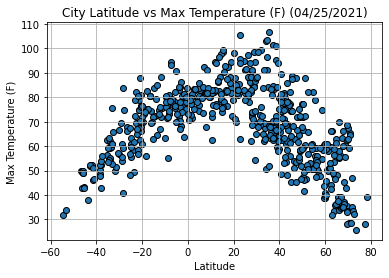

In [11]:
#create the latitude vs temp plot and save the image
plt.grid()
plt.xlabel('Latitude')
plt.ylabel('Max Temperature (F)')
plt.title('City Latitude vs Max Temperature (F) (04/25/2021)')
plt.scatter(city_data['lat'],city_data['temp'],edgecolor='black', linewidths=1,)
plt.savefig("../../output_data/city_lat_vs_max_temp.png")

 Latitude vs. Humidity Plot

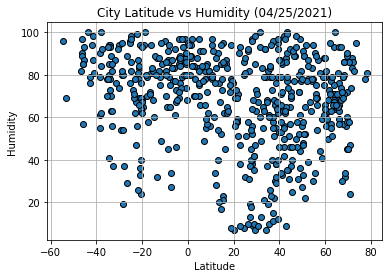

In [12]:
#create the latitude vs humidity plot and save the image
plt.grid()
plt.xlabel('Latitude')
plt.ylabel('Humidity')
plt.title('City Latitude vs Humidity (04/25/2021)')
plt.scatter(city_data['lat'],city_data['humidity'],edgecolor='black', linewidths=1,)
plt.savefig("../../output_data/City_Lat_vs_Humidity.png")

 Latitude vs. Cloudiness Plot

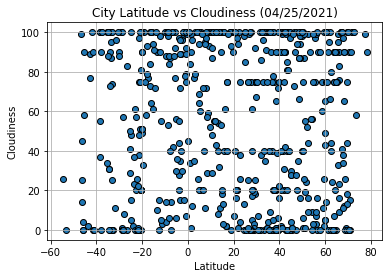

In [13]:
#cretae the latitude s cloudiness plot and save the image
plt.grid()
plt.xlabel('Latitude')
plt.ylabel('Cloudiness')
plt.title('City Latitude vs Cloudiness (04/25/2021)')
plt.scatter(city_data['lat'],city_data['cloudiness'],edgecolor='black', linewidths=1,)
plt.savefig("../../output_data/City_Lat_vs Cloudiness_.png")

 Latitude vs. Wind Speed Plot

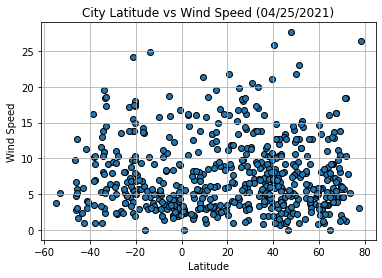

In [15]:
#plot the latitiude vs windspeed plot and save the image
plt.grid()
plt.xlabel('Latitude')
plt.ylabel('Wind Speed')
plt.title('City Latitude vs Wind Speed (04/25/2021)')
plt.scatter(city_data['lat'],city_data['wind'],edgecolor='black', linewidths=1,)
plt.savefig("../../output_data/City_Lat_vs_Wind_Speed.png")

Linear Regression


Northern Hemisphere - Max Temp vs. Latitude Linear Regression

In [17]:
north = city_data.loc[city_data["lat"]>= 0]
south = city_data.loc[city_data["lat"]<= 0]

Thhe r-value is -0.73


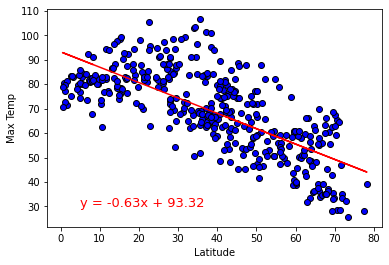

<Figure size 432x288 with 0 Axes>

In [24]:
# establish linear regression values
slope, intercept, rValue, pValue, stderror = linregress(north['lat'], north['temp'])
print(f'Thhe r-value is {round(rValue, 2)}')

# linear regression line
regress = slope*(north['lat']) + intercept
regresstring = "y = " + str(round(slope, 2)) + 'x + ' + str(round(intercept, 2))
plt.annotate(regresstring, xy=(5,30), fontsize=13, color="red")    

#plot and save the image
plt.plot(north['lat'],regress,"-",color="red") 
plt.scatter(north['lat'],north['temp'], marker = "o", facecolors = 'blue', edgecolor='black')
plt.xlabel('Latitude')
plt.ylabel('Max Temp')
plt.show()
plt.savefig("../../output_data/Northern_Hemisphere_Max_Temp_vs_Latitude_Linear_Regression.png")

 Southern Hemisphere - Max Temp vs. Latitude Linear Regression

The r-value is 0.8


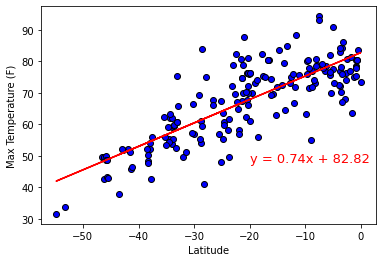

<Figure size 432x288 with 0 Axes>

In [25]:
# establish linear regression values
slope, intercept, rValue, pValue, stderror = linregress(south['lat'], south['temp'])
print(f'The r-value is {round(rValue, 2)}')

# linear regression line 
regress = slope*(south['lat']) + intercept
regresstring = "y = " + str(round(slope, 2)) + 'x + ' + str(round(intercept, 2))
plt.annotate(regresstring, xy=(-20,48), fontsize=13, color="red")  

#plot and save image
plt.plot(south['lat'],regress,"-",color="red") 
plt.scatter(south['lat'],south['temp'], marker = "o", facecolors = 'blue', edgecolor='black')
plt.xlabel('Latitude')
plt.ylabel('Max Temperature (F)')
plt.show()
plt.savefig("../../output_data/Southern_Hemisphere_Max_Temp_vs_Latitude_Linear_Regression.png")

 Northern Hemisphere - Humidity (%) vs. Latitude Linear Regression

The r-value is -0.01


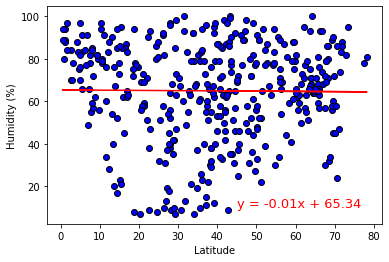

<Figure size 432x288 with 0 Axes>

In [32]:
# establish linear regression values
slope, intercept, rValue, pValue, stderror = linregress(north['lat'], north['humidity'])
print(f'The r-value is {round(rValue, 2)}')

# linear regression line 
regress = slope*(north['lat']) + intercept
regresstring = "y = " + str(round(slope, 2)) + 'x + ' + str(round(intercept, 2))
plt.annotate(regresstring, xy=(45,10), fontsize=13, color="red") 

#plot and save image
plt.plot(north['lat'],regress,"-",color="red") 
plt.scatter(north['lat'],north['humidity'], marker = "o", facecolors = 'blue', edgecolor='black')
plt.xlabel('Latitude')
plt.ylabel('Humidity (%)')
plt.show()
plt.savefig("../../output_data/Northern_Hemisphere_Humidity_vs_Latitude_Linear_Regression.png")


 Southern Hemisphere - Humidity (%) vs. Latitude Linear Regression

The r-value is -0.02


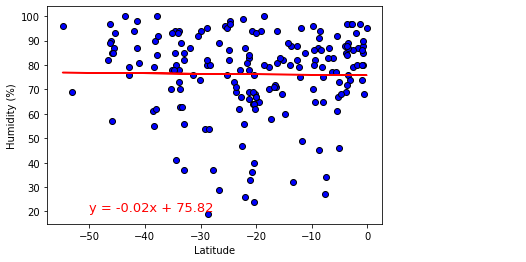

<Figure size 432x288 with 0 Axes>

In [33]:
# establish linear regression values 
slope, intercept, rValue, pValue, stderror = linregress(south['lat'], south['humidity'])
print(f'The r-value is {round(rValue, 2)}')

# linear regression line 
regress = slope*(south['lat']) + intercept
regresstring = "y = " + str(round(slope, 2)) + 'x + ' + str(round(intercept, 2))
plt.annotate(regresstring, xy=(-50,20), fontsize=13, color="red")  

#plot and save image
plt.plot(south['lat'],regress,"-",color="red") 
plt.scatter(south['lat'],south['humidity'], marker = "o", facecolors = 'blue', edgecolor='black')
plt.xlabel('Latitude')
plt.ylabel('Humidity (%)')
plt.annotate(regresstring, xy=(5,30), fontsize=13, color="blue") 
plt.show()
plt.savefig("../../output_data/Southern_Hemisphere_Humidity_vs_Latitude_Linear_Regression.png")


 Northern Hemisphere - Cloudiness (%) vs. Latitude Linear Regression

The r-value is -0.05


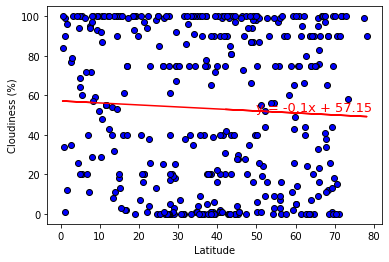

<Figure size 432x288 with 0 Axes>

In [34]:
#establish_linear_regression_values
slope, intercept, rValue, pValue, stderror = linregress(north['lat'], north['cloudiness'])
print(f'The r-value is {round(rValue, 2)}')

# linear regression line 
regress = slope*(north['lat']) + intercept
regresstring = "y = " + str(round(slope, 2)) + 'x + ' + str(round(intercept, 2))
plt.annotate(regresstring, xy=(50,52), fontsize=13, color="red") 

#plot and save image
plt.plot(north['lat'],regress,"-",color="red") 
plt.scatter(north['lat'], north['cloudiness'], marker = "o", facecolors = 'blue', edgecolor='black')
plt.xlabel('Latitude')
plt.ylabel('Cloudiness (%)')
plt.show()
plt.savefig("../../output_data/Northern_Hemisphere_Cloudiness_vs_Latitude_Linear_Regression.png")

Southern Hemisphere - Cloudiness (%) vs. Latitude Linear Regression

The r-value is 0.16


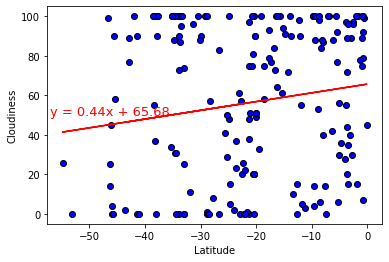

<Figure size 432x288 with 0 Axes>

In [35]:
# establish linear regression values 
slope, intercept, rValue, pValue, stderror = linregress(south['lat'], south['cloudiness'])
print(f'The r-value is {round(rValue, 2)}')

# linear regression line 
regress = slope*(south['lat']) + intercept
regresstring = "y = " + str(round(slope, 2)) + 'x + ' + str(round(intercept, 2))
plt.annotate(regresstring, xy=(-57,50), fontsize=13, color="red")  

#plot and save image
plt.plot(south['lat'],regress,"-",color="red") 
plt.scatter(south['lat'],south['cloudiness'], marker = "o", facecolors = 'blue', edgecolor='black')
plt.xlabel('Latitude')
plt.ylabel('Cloudiness')
plt.show()
plt.savefig("../../output_data/Southern_Hemisphere_Cloudiness_vs_Latitude_Linear_Regression.png")

 Northern Hemisphere - Wind Speed (mph) vs. Latitude Linear Regression

The r-value is -0.03


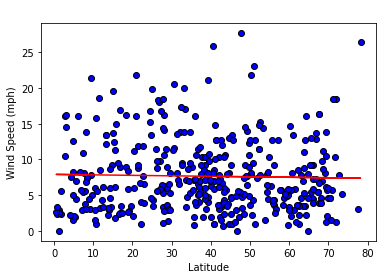

<Figure size 432x288 with 0 Axes>

In [36]:
# establish linear regression values
slope, intercept, rValue, pValue, stderror = linregress(north['lat'], north['wind'])
print(f'The r-value is {round(rValue, 2)}')

# linear regression line 
regress = slope*(north['lat']) + intercept
regresstring = "y = " + str(round(slope, 2)) + 'x + ' + str(round(intercept, 2))
plt.annotate(regresstring, xy=(45,30), fontsize=13, color="red") 

#plot and save
plt.plot(north['lat'],regress,"-",color="red") 
plt.scatter(north['lat'],north['wind'], marker = "o", facecolors = 'blue', edgecolor='black')
plt.xlabel('Latitude')
plt.ylabel('Wind Speed (mph)')
plt.show()
plt.savefig("../../output_data/Northern_Hemisphere_Wind_Speed_vs_Latitude_Linear_Regression.png")

Southern Hemisphere - Wind Speed (mph) vs. Latitude Linear Regression

The r-value is -0.1


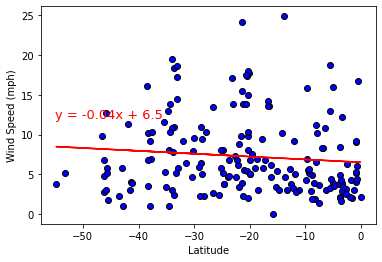

<Figure size 432x288 with 0 Axes>

In [37]:
# establish linear regression values
slope, intercept, rValue, pValue, stderror = linregress(south['lat'], south['wind'])
print(f'The r-value is {round(rValue, 2)}')

# linear regression line 
regress = slope*(south['lat']) + intercept
regresstring = "y = " + str(round(slope, 2)) + 'x + ' + str(round(intercept, 2))
plt.annotate(regresstring, xy=(-55,12), fontsize=13, color="red") 

#plot and save image
plt.plot(south['lat'],regress,"-",color="red") 
plt.scatter(south['lat'],south['wind'], marker = "o", facecolors = 'blue', edgecolor='black')
plt.xlabel('Latitude')
plt.ylabel('Wind Speed (mph)')
plt.show()
plt.savefig("../../output_data/Southern_Hemisphere_Wind_Speed_vs_Latitude_Linear_Regression.png")

In [ ]:
#three observable trends

#1. As the latitude goes towards 0 the higher the temperature.
#2. Latitude and max temperature have a much higher correlation than the rest of the plots.
#3. Cloudiness and humidity are random across both the nothern and southern hemisphere.